### Bound-free Gaunt factor calculated following Karzas and Latter 1961.

The bound free Gaunt factor is defined as

$$ g_{bf} = \frac{\sigma_{bf}}{\sigma_{bf}^{K}} $$

where 

$\sigma_{bf} $ is the quantum-mechanical bound-free cross-section

$ \sigma_{bf}^{K} $ is the semi-classical Kramer's cross-section

For reference, see equation 40 of Karzas and Latter 1961.


In [1]:
%reset
import math 
import numpy as np 
import matplotlib.pyplot as plt 

# Constants in CGS units: http://www.astro.wisc.edu/~dolan/constants.html
R = 2.1798741e-11 # Rydber's constant [erg]
c = 2.99792458e10 # speed of light [cm s-1.]
e_charge = 4.8032068e-10 # electron charge [esu]
e_mass = 9.1093897e-28 # electron mass [g]

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# General function for the gaunt factor
def get_gaunt_factor_bf(sigma_bf_below, sigma_bf_above, sigma_bf_kramer): 
    gaunt_factor = (sigma_bf_below+sigma_bf_above)/sigma_bf_kramer
    return gaunt_factor

# Kramer's cross section (39)
def get_kramer_sigma(n, E, Z): 
    
    eta = math.sqrt(Z*Z*R/E)
    rho = eta/n

    kramer_sigma = 2.**4./(3*math.sqrt(3.))*e_charge**2./(e_mass*c*v) *1./n *(rho**2/(1+rho**2))**2. 
    return kramer_sigma

# Quantum cross section going to l-1 (36)
def sigma_bf_below(n, l, E, Z): 
    
    eta = math.sqrt(Z*Z*R/E)
    rho = eta/n

    p1 = math.pi*e_charge**2/(e_mass*c*v)
    p2 = 2.**(4*l)/3.
    
    p3 = l**2 * math.factorial(n+l)
    
    l = int(l)
    
    # make sure we're counting for the extreme cases, when l = 0 or 1
    if l == 0: 
        return 0
    elif l ==1: 
        p3 = 1
    else:
        for i in range(1, l): 
            p3 *= (i**2 + eta**2)
    
    # the factorial of a negative number does not exist
    if n-l-1<0: 
        return 0
    else:
        p4 = math.factorial(2*l+1) *math.factorial(2*l-1) * math.factorial(n-l-1)
    
    p5 = math.exp(-4*eta*math.atan(1/rho))/(1-math.exp(-2*math.pi*eta)) # do I have the arctan function right?
    # also is this an exponential or just the charge 

    p6 = rho**(2*l+2)/(1+rho**2)**(2*n-2)
    
    p7 = (G_l(l,-(l+1-n),eta,rho)-(1+rho**2)**(-2)*G_l(l,-(l-1-n),eta,rho))**2 # still need to define G_l
    
    all_together = p1*p2*p3/p4*p5*p6*p7
    
    return all_together

# Quantum cross section going to l+1 (37)
def sigma_bf_above(n, l, E, Z): 
    
    eta = math.sqrt(Z*Z*R/E)
    rho = eta/n
    
    p1 = math.pi*e_charge**2/(e_mass*c*v)
    
    p2 = 2.**(4*l+6)/3.
    

    p3= (l+1)**2 * math.factorial(n+l)

    l = int(l)
    n = int(n)
    
#     print "First", p3, l
    for i in range(1,l+2): 
#         print i
        p3 *= (i**2+eta**2)
    
#     print "Then", p3, l
    
    if n-l-1<0: 
        return 0
    else:
        p4 = (2*l+1)*math.factorial(2*l+1)*math.factorial(2*l+2)*math.factorial(n-l-1)*((l+1)**2+eta**2)**2
    
    p5 = math.exp(-4*eta*math.atan(1/rho))/(1-math.exp(-2*math.pi*eta)) # is this exponential or electron charge 
#     print p5 
    
    p6 = rho**(2*l+4)*eta**2/(1+rho**2)**(2*n)
    
    p7 = ((l+1-n)*G_l(l+1,-(l+1-n),eta,rho)+(l+1+n)/(1+rho**2)*G_l(l+1,-(l-n),eta,rho))**2 # still need to define G_l
    
#     print E, p6, eta**2.
    
#     print p4, eta**4.

#     print G_l(l+1,-(l-n),eta,rho), eta**2
    
    all_together = p1*p2*p3/p4*p5*p6*p7
    
    return all_together

# Bound free matrix element Gl (appendix C)
def G_l(l, m, eta, rho): 
    
    m = int(m)
    gl = 0
    for s in range(0,2*m+1): 
        gl += b_const(s, l, m, eta, rho)*rho**s
#         print s, b_const(s, l, m, eta, rho), rho
#     print 
    return gl 

# constant for the Gl free matrix element (Appendix c, eqn c8)
def b_const(s, l, m, eta, rho):
    
#     print "S used", s, l
    
    if s==0:
        return 1
    elif s==1: 
#         print "Printing at b", m, eta
        return 2*m*eta/l
    else:
        p1 = (4*eta*(s-1-m))*b_const(s-1, l, m, eta, rho)
        p2 = (2*m+2-s)*(2*m+2*l+1-s)*b_const(s-2, l, m,  eta, rho)
        return -1./(s*(s+2*l-1))*(p1+p2)

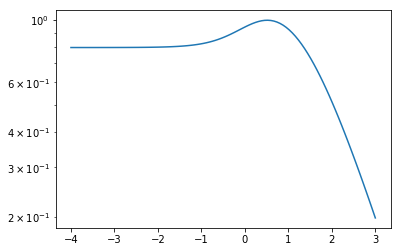

In [3]:


n = 1. 
l = 0
E = 1.
Z = 1.
v= 1.

coeff_array = np.linspace(-4, 3, 100)

E_array = 10**(coeff_array)*Z**2*R

x_array = np.log(E_array/(Z**2*R))
gaunt_array = []

for E in E_array: 
    s_kramer = get_kramer_sigma(n, E, Z)
    s_below = sigma_bf_below(n, l, E, Z)
    s_above = sigma_bf_above(n, l, E, Z)

    gaunt_array.append(get_gaunt_factor_bf(s_below, s_above, s_kramer))
#     print s_above, s_kramer, get_gaunt_factor_bf(s_below, s_above, s_kramer)
    
plt.figure()
plt.plot(coeff_array, gaunt_array)
plt.yscale("log")
# plt.gca().invert_yaxis()
plt.show()

    

## Bound Free emissivity formulas

In [13]:
import numpy as np 

def gamma_fb(Z,v,T,vo,gfb): #equation 4.23 of Osterbrock
    #v is the frequency
    gamma= 32.*(Z**2.)*h*e_charge**4. / (3.*(e_mass**2.)*c**3.) * (np.pi*h*vo/(3.*k*T))**0.5 *np.exp(-h*v/(k*T)) * gfb
    return gamma 

def emissivity(Np, Ne, gamma): #equation 4.22 of Osterbrock
    #Np= number density of protons
    #Ne= number density of electrions, from table 4.6 of Osterbrock
    Jv= Nt*Ne*gamma/ (4.*np.pi)
    return Jv

def Lyman_C(gamma, alpha_b, fesc, Nlyc): #equation from Ono et al. 2010
    #alpha_b= case B recombination coefficient for hydrogen cm3 s-1 -- table 4.6 in Osterbrock
    #fesc= escape fraction of radiation
    #Nlyc=Number of LyC photons/ s --comes from our pop synthesis model
    Lv=gamma * (1-fesc) * Nlyc / alpha_b


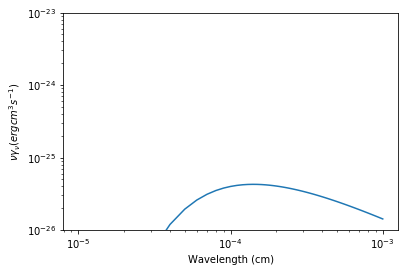

In [14]:
#reproducing the final plot

# Constants in CGS units: http://www.astro.wisc.edu/~dolan/constants.html, thanks Enia <3
R = 2.1798741e-11 # Rydber's constant [erg]
c = 2.99792458e10 # speed of light [cm s-1.]
e_charge = 4.8032068e-10 # electron charge [esu]
e_mass = 9.1093897e-28 # electron mass [g]
h = 6.6260755e-27 # planck's constant [erg s]
k = 1.380658e-16 #Boltzmann constant [erg K-1]
n = 1. 
l = 0
Z = 1.
T= 10000. #K

wavelength=np.linspace(1e-5,1e-3,100) #centimeters

def frequency(x):
    return c/x

frequencies=frequency(wavelength)

def energy(freq):
    return h * freq

energies=energy(frequencies)

vo=R/h
y=[]
for i in range(len(energies)):
    s_kramer = get_kramer_sigma(n, energies[i], Z)
    s_below = sigma_bf_below(n, l, energies[i], Z)
    s_above = sigma_bf_above(n, l, energies[i], Z)
    gfb=(get_gaunt_factor_bf(s_below, s_above, s_kramer))
    gamma=gamma_fb(Z,frequencies[i],T,vo,gfb) 
    y.append(gamma*frequencies[i])

plt.plot(wavelength, y)
plt.xscale('log')
plt.yscale('log')
plt.ylim(10e-27,10e-24)
plt.xlabel('Wavelength (cm)')
plt.ylabel(r'$\nu\gamma_{\nu} (erg  cm^3  s^{-1})$')
plt.show()


In [37]:
lda=2600 / (1e8) #looking at table 4.7 in osterbrock? 
fr= c/lda
vo=R/h
s_kramer = get_kramer_sigma(n, fr*h, Z)
s_below = sigma_bf_below(n, l, fr*h, Z)
s_above = sigma_bf_above(n, l, fr*h, Z)
gfb=(get_gaunt_factor_bf(s_below, s_above, s_kramer))
gamma=gamma_fb(Z,fr,T,vo,gfb) 
y=(gamma)
print(y/(1e-40)) #off BUT the gamma in table 4.7 is (probably) the combined gamma for bf and ff

0.0235354958967
